In [1]:
pip install yfinance

In [22]:
pip install tensorflow

In [25]:
import seaborn as sns
import pandas_datareader as web
import numpy as np
import pandas as pd 
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as pdr
import pandas as pd

yf.pdr_override()

start = datetime.strptime('2014-01-01', '%Y-%m-%d')
end = datetime.strptime('2022-06-01', '%Y-%m-%d')

# df = pdr.get_data_yahoo("AAPL", start, end)
# df
df = pdr.get_data_yahoo("MSFT", start, end).reset_index()
df.dtypes

[*********************100%***********************]  1 of 1 completed


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [3]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [4]:
df['DATE'] = df['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

Text(0.5, 1.0, 'Price history')

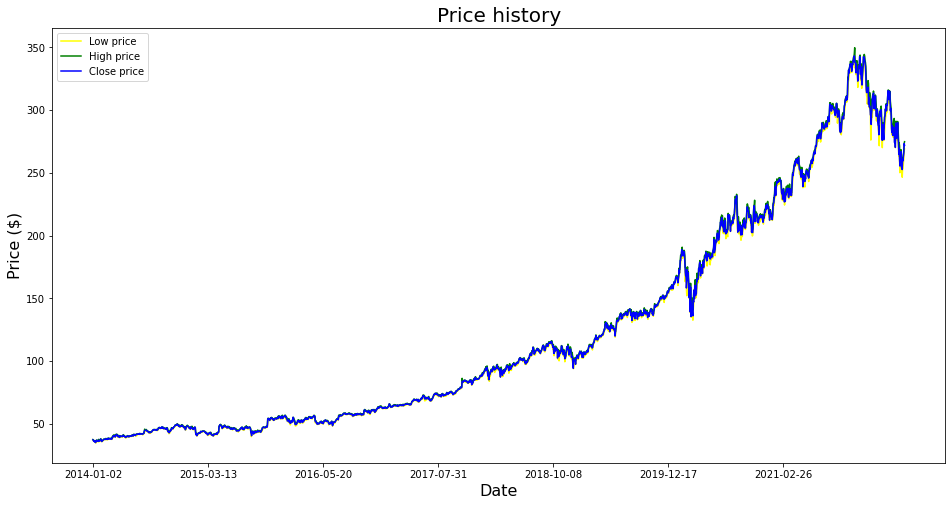

In [25]:
N = df.shape[0]
plt.figure(figsize = (16,8))
plt.plot(df['Low'], color = 'yellow', label = 'Low price')
plt.plot(df['High'], color = 'green', label = 'High price')
plt.plot(df['Close'], color = 'blue', label = 'Close price')
# plt.xticks(np.arange(0, N +1, np.int(N/10)), df['Date'][0:N:np.int(N/10)])
plt.xticks(np.arange(0,1857, 300), df['DATE'][0:1857:300])
plt.xlabel('Date', fontsize = 16)
plt.ylabel('Price ($)', fontsize = 16)
plt.legend()
plt.title('Price history', fontsize = 20)

In [29]:
df = pd.read_csv('C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/Train_Status.csv')
df.columns

Index(['S No', 'Name of Stock'], dtype='object')

In [30]:
out = []

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

In [31]:
for i in df["Name of Stock"]:
        print("Running LSTM for :"+i)
        try:
            data = pd.read_csv("C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/individual_stocks_5yr/"+i+"_data.csv")
            #data1 = data['close'].values
        except:
            start = datetime.strptime('2014-01-01', '%Y-%m-%d')
            end = datetime.strptime('2022-06-01', '%Y-%m-%d')
            data = pdr.get_data_yahoo(i, start, end).reset_index()
            data['DATE'] = data['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
            data.columns = ["date","open","high","low","close",'Adj Close',"volume",'DATE']
            # Create a new dataframe with only the 'Close column 
        data1 = data.filter(['close'])
        # Convert the dataframe to a numpy array
        dataset = data1.values
        # Get the number of rows to train the model on
        training_data_len = int(np.ceil( len(dataset) * 0.8 ))
#         training_data_len
        scaler = MinMaxScaler(feature_range=(0,1))
        scaled_data = scaler.fit_transform(dataset)
        train_data = scaled_data[0:int(training_data_len), :]
        # Split the data into x_train and y_train data sets
        x_train = []
        y_train = []
        for j in range(60, len(train_data)):
            x_train.append(train_data[j-60:j, 0])
            y_train.append(train_data[j, 0])      
        # Convert the x_train and y_train to numpy arrays 
        x_train, y_train = np.array(x_train), np.array(y_train)
        x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
        model = Sequential()
        model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
        model.add(LSTM(64, return_sequences=False))
        model.add(Dense(25))
        model.add(Dense(1))

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Train the model
        model.fit(x_train, y_train, batch_size=1, epochs=10)
        test_data = scaled_data[training_data_len - 60: , :]
        # Create the data sets x_test and y_test
        x_test = []
        y_test = dataset[training_data_len:, :]
        for k in range(60, len(test_data)):
            x_test.append(test_data[k-60:k, 0])

        # Convert the data to a numpy array
        x_test = np.array(x_test)

        # Reshape the data
        x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

        # Get the models predicted price values 
        predictions = model.predict(x_test)
        predictions = scaler.inverse_transform(predictions)
        train = data1[:training_data_len]
        valid = data[training_data_len:]
        valid['Predictions'] = predictions
#         print(valid)
        valid.to_csv("C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/results_LSTM/"+i+"_results.csv")
        error = mean_squared_error(y_test, predictions)
        error2 = smape_kun(y_test, predictions)
#         print(error)
#         print(error2)
        out.append([i,error,error1])

Running LSTM for :AAPL
Epoch 1/10
948/948 [==============================] - 82s 79ms/step - loss: 0.0015
Epoch 2/10
948/948 [==============================] - 60s 64ms/step - loss: 7.5028e-04
Epoch 3/10
948/948 [==============================] - 33s 35ms/step - loss: 5.1754e-04
Epoch 4/10
948/948 [==============================] - 33s 35ms/step - loss: 3.3337e-04
Epoch 5/10
948/948 [==============================] - 46s 48ms/step - loss: 3.5717e-04
Epoch 6/10
948/948 [==============================] - 61s 64ms/step - loss: 3.9943e-04
Epoch 7/10
948/948 [==============================] - 63s 66ms/step - loss: 3.6923e-04
Epoch 8/10
948/948 [==============================] - 45s 48ms/step - loss: 3.1388e-04
Epoch 9/10
948/948 [==============================] - 40s 42ms/step - loss: 3.2669e-04
Epoch 10/10
8/8 [==============================] - 3s 113ms/step
Running LSTM for :MSFT


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 68s 65ms/step - loss: 0.0013
Epoch 2/10
948/948 [==============================] - 58s 61ms/step - loss: 4.6724e-04
Epoch 3/10
948/948 [==============================] - 56s 59ms/step - loss: 3.5678e-04
Epoch 4/10
948/948 [==============================] - 46s 48ms/step - loss: 3.0936e-04
Epoch 5/10
948/948 [==============================] - 40s 42ms/step - loss: 2.5543e-04
Epoch 6/10
948/948 [==============================] - 37s 39ms/step - loss: 2.4292e-04
Epoch 7/10
948/948 [==============================] - 37s 39ms/step - loss: 2.0667e-04
Epoch 8/10
948/948 [==============================] - 37s 39ms/step - loss: 2.3020e-04
Epoch 9/10
948/948 [==============================] - 38s 40ms/step - loss: 2.6042e-04
Epoch 10/10
8/8 [==============================] - 2s 60ms/step
Running LSTM for :AMZN


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 44s 40ms/step - loss: 7.2459e-04
Epoch 2/10
948/948 [==============================] - 38s 40ms/step - loss: 4.3640e-04
Epoch 3/10
948/948 [==============================] - 37s 39ms/step - loss: 2.7424e-04
Epoch 4/10
948/948 [==============================] - 36s 38ms/step - loss: 2.6649e-04
Epoch 5/10
948/948 [==============================] - 40s 42ms/step - loss: 2.1957e-04
Epoch 6/10
948/948 [==============================] - 40s 43ms/step - loss: 2.0287e-04
Epoch 7/10
948/948 [==============================] - 40s 43ms/step - loss: 1.6567e-04
Epoch 8/10
948/948 [==============================] - 41s 43ms/step - loss: 1.8884e-04
Epoch 9/10
948/948 [==============================] - 44s 46ms/step - loss: 1.9102e-04
Epoch 10/10
8/8 [==============================] - 3s 78ms/step
Running LSTM for :GOOGL


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 43s 39ms/step - loss: 0.0015
Epoch 2/10
948/948 [==============================] - 35s 37ms/step - loss: 7.0300e-04
Epoch 3/10
948/948 [==============================] - 35s 37ms/step - loss: 4.1997e-04
Epoch 4/10
948/948 [==============================] - 37s 39ms/step - loss: 3.8749e-04
Epoch 5/10
948/948 [==============================] - 40s 43ms/step - loss: 3.3413e-04
Epoch 6/10
948/948 [==============================] - 40s 42ms/step - loss: 2.6831e-04
Epoch 7/10
948/948 [==============================] - 40s 42ms/step - loss: 3.4600e-04
Epoch 8/10
948/948 [==============================] - 40s 42ms/step - loss: 2.7363e-04
Epoch 9/10
948/948 [==============================] - 41s 43ms/step - loss: 3.0876e-04
Epoch 10/10
8/8 [==============================] - 3s 69ms/step
Running LSTM for :BRK.B


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 48s 43ms/step - loss: 0.0010
Epoch 2/10
948/948 [==============================] - 42s 44ms/step - loss: 4.3557e-04
Epoch 3/10
948/948 [==============================] - 45s 47ms/step - loss: 3.8469e-04
Epoch 4/10
948/948 [==============================] - 42s 44ms/step - loss: 2.4816e-04
Epoch 5/10
948/948 [==============================] - 41s 43ms/step - loss: 2.6934e-04
Epoch 6/10
948/948 [==============================] - 36s 38ms/step - loss: 2.7598e-04
Epoch 7/10
948/948 [==============================] - 36s 38ms/step - loss: 2.2776e-04
Epoch 8/10
948/948 [==============================] - 36s 38ms/step - loss: 2.3101e-04
Epoch 9/10
948/948 [==============================] - 35s 37ms/step - loss: 2.7081e-04
Epoch 10/10
8/8 [==============================] - 2s 56ms/step
Running LSTM for :UNH


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 41s 38ms/step - loss: 8.0789e-04
Epoch 2/10
948/948 [==============================] - 35s 37ms/step - loss: 3.6888e-04
Epoch 3/10
948/948 [==============================] - 36s 38ms/step - loss: 2.5736e-04
Epoch 4/10
948/948 [==============================] - 36s 38ms/step - loss: 2.1505e-04
Epoch 5/10
948/948 [==============================] - 36s 38ms/step - loss: 1.9210e-04
Epoch 6/10
948/948 [==============================] - 36s 38ms/step - loss: 1.3679e-04
Epoch 7/10
948/948 [==============================] - 37s 39ms/step - loss: 1.7480e-04
Epoch 8/10
948/948 [==============================] - 36s 38ms/step - loss: 1.8585e-04
Epoch 9/10
948/948 [==============================] - 36s 37ms/step - loss: 1.7321e-04
Epoch 10/10
8/8 [==============================] - 2s 54ms/step
Running LSTM for :TSLA


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
1635/1635 [==============================] - 60s 34ms/step - loss: 3.1500e-04
Epoch 2/10
1635/1635 [==============================] - 62s 38ms/step - loss: 2.1704e-04
Epoch 3/10
1635/1635 [==============================] - 65s 40ms/step - loss: 9.3031e-05
Epoch 4/10
1635/1635 [==============================] - 65s 40ms/step - loss: 1.3100e-04
Epoch 5/10
1635/1635 [==============================] - 61s 37ms/step - loss: 1.3296e-04
Epoch 6/10
1635/1635 [==============================] - 52s 32ms/step - loss: 5.3408e-05
Epoch 7/10
1635/1635 [==============================] - 62s 38ms/step - loss: 8.5436e-05
Epoch 8/10
1635/1635 [==============================] - 70s 43ms/step - loss: 8.5343e-05
Epoch 9/10
1635/1635 [==============================] - 91s 56ms/step - loss: 5.3360e-05
Epoch 10/10
14/14 [==============================] - 4s 87ms/step
Running LSTM for :GOOG


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
720/720 [==============================] - 48s 55ms/step - loss: 0.0017
Epoch 2/10
720/720 [==============================] - 42s 59ms/step - loss: 7.8854e-04
Epoch 3/10
720/720 [==============================] - 32s 45ms/step - loss: 5.2143e-04
Epoch 4/10
720/720 [==============================] - 28s 39ms/step - loss: 4.8234e-04
Epoch 5/10
720/720 [==============================] - 28s 39ms/step - loss: 4.1966e-04
Epoch 6/10
720/720 [==============================] - 34s 47ms/step - loss: 3.4805e-04
Epoch 7/10
720/720 [==============================] - 40s 56ms/step - loss: 4.2814e-04
Epoch 8/10
720/720 [==============================] - 45s 62ms/step - loss: 3.9141e-04
Epoch 9/10
720/720 [==============================] - 44s 61ms/step - loss: 3.7604e-04
Epoch 10/10
7/7 [==============================] - 2s 59ms/step
Running LSTM for :XOM


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 46s 42ms/step - loss: 0.0044
Epoch 2/10
948/948 [==============================] - 38s 40ms/step - loss: 0.0019
Epoch 3/10
948/948 [==============================] - 38s 40ms/step - loss: 0.0017
Epoch 4/10
948/948 [==============================] - 38s 40ms/step - loss: 0.0013
Epoch 5/10
948/948 [==============================] - 38s 40ms/step - loss: 0.0014
Epoch 6/10
948/948 [==============================] - 43s 45ms/step - loss: 0.0013
Epoch 7/10
948/948 [==============================] - 42s 44ms/step - loss: 0.0014
Epoch 8/10
948/948 [==============================] - 38s 40ms/step - loss: 0.0014
Epoch 9/10
948/948 [==============================] - 39s 41ms/step - loss: 0.0013
Epoch 10/10
8/8 [==============================] - 2s 63ms/step
Running LSTM for :JNJ


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 44s 41ms/step - loss: 0.0015
Epoch 2/10
948/948 [==============================] - 41s 43ms/step - loss: 5.6304e-04
Epoch 3/10
948/948 [==============================] - 40s 42ms/step - loss: 5.1194e-04
Epoch 4/10
948/948 [==============================] - 39s 41ms/step - loss: 4.0097e-04
Epoch 5/10
948/948 [==============================] - 41s 43ms/step - loss: 3.8929e-04
Epoch 6/10
948/948 [==============================] - 50s 52ms/step - loss: 3.3352e-04
Epoch 7/10
948/948 [==============================] - 68s 72ms/step - loss: 3.4583e-04
Epoch 8/10
948/948 [==============================] - 52s 55ms/step - loss: 3.3921e-04
Epoch 9/10
948/948 [==============================] - 39s 41ms/step - loss: 3.3609e-04
Epoch 10/10
8/8 [==============================] - 4s 108ms/step
Running LSTM for :JPM


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 75s 70ms/step - loss: 9.1101e-04
Epoch 2/10
948/948 [==============================] - 63s 66ms/step - loss: 5.8725e-04
Epoch 3/10
948/948 [==============================] - 70s 74ms/step - loss: 4.0222e-04
Epoch 4/10
948/948 [==============================] - 61s 65ms/step - loss: 3.3946e-04
Epoch 5/10
948/948 [==============================] - 66s 69ms/step - loss: 2.6964e-04
Epoch 6/10
948/948 [==============================] - 95s 100ms/step - loss: 3.2383e-04
Epoch 7/10
948/948 [==============================] - 69s 73ms/step - loss: 3.4892e-04
Epoch 8/10
948/948 [==============================] - 42s 45ms/step - loss: 2.7497e-04
Epoch 9/10
948/948 [==============================] - 67s 71ms/step - loss: 2.6645e-04
Epoch 10/10
8/8 [==============================] - 3s 99ms/step
Running LSTM for :NVDA


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 72s 66ms/step - loss: 7.1041e-04
Epoch 2/10
948/948 [==============================] - 63s 67ms/step - loss: 1.8330e-04
Epoch 3/10
948/948 [==============================] - 86s 91ms/step - loss: 1.6280e-04
Epoch 4/10
948/948 [==============================] - 74s 79ms/step - loss: 1.9829e-04
Epoch 5/10
948/948 [==============================] - 81s 86ms/step - loss: 1.0586e-04
Epoch 6/10
948/948 [==============================] - 79s 83ms/step - loss: 1.9755e-04
Epoch 7/10
948/948 [==============================] - 74s 78ms/step - loss: 8.7214e-05
Epoch 8/10
948/948 [==============================] - 56s 59ms/step - loss: 9.2872e-05
Epoch 9/10
948/948 [==============================] - 53s 56ms/step - loss: 1.3173e-04
Epoch 10/10
8/8 [==============================] - 2s 83ms/step
Running LSTM for :PG


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 55s 51ms/step - loss: 0.0036
Epoch 2/10
948/948 [==============================] - 48s 51ms/step - loss: 0.0018
Epoch 3/10
948/948 [==============================] - 48s 51ms/step - loss: 0.0013
Epoch 4/10
948/948 [==============================] - 51s 54ms/step - loss: 0.0013
Epoch 5/10
948/948 [==============================] - 49s 52ms/step - loss: 0.0013
Epoch 6/10
948/948 [==============================] - 46s 49ms/step - loss: 0.0013
Epoch 7/10
948/948 [==============================] - 50s 53ms/step - loss: 0.0012
Epoch 8/10
948/948 [==============================] - 55s 58ms/step - loss: 0.0012
Epoch 9/10
948/948 [==============================] - 62s 65ms/step - loss: 0.0011
Epoch 10/10
8/8 [==============================] - 3s 98ms/step
Running LSTM for :V


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 63s 58ms/step - loss: 0.0010
Epoch 2/10
948/948 [==============================] - 83s 87ms/step - loss: 4.4071e-04
Epoch 3/10
948/948 [==============================] - 49s 51ms/step - loss: 3.8203e-04
Epoch 4/10
948/948 [==============================] - 45s 47ms/step - loss: 2.8739e-04
Epoch 5/10
948/948 [==============================] - 69s 73ms/step - loss: 2.7134e-04
Epoch 6/10
948/948 [==============================] - 52s 54ms/step - loss: 2.8114e-04
Epoch 7/10
948/948 [==============================] - 48s 51ms/step - loss: 2.4439e-04
Epoch 8/10
948/948 [==============================] - 43s 45ms/step - loss: 2.4452e-04
Epoch 9/10
948/948 [==============================] - 44s 46ms/step - loss: 2.6805e-04
Epoch 10/10
8/8 [==============================] - 7s 104ms/step
Running LSTM for :CVX


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 71s 65ms/step - loss: 0.0037
Epoch 2/10
948/948 [==============================] - 65s 69ms/step - loss: 0.0014
Epoch 3/10
948/948 [==============================] - 58s 61ms/step - loss: 0.0011
Epoch 4/10
948/948 [==============================] - 64s 67ms/step - loss: 8.5203e-04
Epoch 5/10
948/948 [==============================] - 45s 47ms/step - loss: 9.2551e-04
Epoch 6/10
948/948 [==============================] - 43s 45ms/step - loss: 8.5550e-04
Epoch 7/10
948/948 [==============================] - 41s 43ms/step - loss: 7.7170e-04
Epoch 8/10
948/948 [==============================] - 47s 49ms/step - loss: 8.1698e-04
Epoch 9/10
948/948 [==============================] - 56s 59ms/step - loss: 8.1163e-04
Epoch 10/10
8/8 [==============================] - 3s 100ms/step
Running LSTM for :HD


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 86s 78ms/step - loss: 0.0015
Epoch 2/10
948/948 [==============================] - 70s 74ms/step - loss: 4.6171e-04
Epoch 3/10
948/948 [==============================] - 83s 87ms/step - loss: 3.5010e-04
Epoch 4/10
948/948 [==============================] - 68s 72ms/step - loss: 2.7834e-04
Epoch 5/10
948/948 [==============================] - 65s 68ms/step - loss: 2.4887e-04
Epoch 6/10
948/948 [==============================] - 93s 98ms/step - loss: 2.2983e-04
Epoch 7/10
948/948 [==============================] - 89s 94ms/step - loss: 2.4953e-04
Epoch 8/10
948/948 [==============================] - 81s 85ms/step - loss: 1.8824e-04
Epoch 9/10
948/948 [==============================] - 71s 75ms/step - loss: 1.9978e-04
Epoch 10/10
8/8 [==============================] - 4s 106ms/step
Running LSTM for :LLY


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 80s 74ms/step - loss: 0.0046
Epoch 2/10
948/948 [==============================] - 64s 67ms/step - loss: 0.0019
Epoch 3/10
948/948 [==============================] - 66s 69ms/step - loss: 0.0014
Epoch 4/10
948/948 [==============================] - 67s 71ms/step - loss: 0.0011
Epoch 5/10
948/948 [==============================] - 61s 64ms/step - loss: 0.0013
Epoch 6/10
948/948 [==============================] - 60s 64ms/step - loss: 0.0012
Epoch 7/10
948/948 [==============================] - 64s 67ms/step - loss: 0.0012
Epoch 8/10
948/948 [==============================] - 47s 50ms/step - loss: 0.0012
Epoch 9/10
948/948 [==============================] - 48s 51ms/step - loss: 0.0011
Epoch 10/10
8/8 [==============================] - 2s 80ms/step
Running LSTM for :MA


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 65s 63ms/step - loss: 0.0010
Epoch 2/10
948/948 [==============================] - 48s 50ms/step - loss: 3.5166e-04
Epoch 3/10
948/948 [==============================] - 44s 46ms/step - loss: 3.1182e-04
Epoch 4/10
948/948 [==============================] - 44s 46ms/step - loss: 2.5507e-04
Epoch 5/10
948/948 [==============================] - 40s 43ms/step - loss: 2.0419e-04
Epoch 6/10
948/948 [==============================] - 43s 46ms/step - loss: 1.8105e-04
Epoch 7/10
948/948 [==============================] - 41s 43ms/step - loss: 1.9741e-04
Epoch 8/10
948/948 [==============================] - 49s 51ms/step - loss: 1.5652e-04
Epoch 9/10
948/948 [==============================] - 77s 81ms/step - loss: 2.2644e-04
Epoch 10/10
8/8 [==============================] - 2s 76ms/step
Running LSTM for :BAC


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 68s 66ms/step - loss: 0.0011
Epoch 2/10
948/948 [==============================] - 81s 85ms/step - loss: 6.1577e-04
Epoch 3/10
948/948 [==============================] - 76s 81ms/step - loss: 4.3404e-04
Epoch 4/10
948/948 [==============================] - 81s 86ms/step - loss: 2.9251e-04
Epoch 5/10
948/948 [==============================] - 89s 94ms/step - loss: 3.4276e-04
Epoch 6/10
948/948 [==============================] - 57s 60ms/step - loss: 2.9722e-04
Epoch 7/10
948/948 [==============================] - 44s 47ms/step - loss: 2.8862e-04
Epoch 8/10
948/948 [==============================] - 46s 49ms/step - loss: 2.7806e-04
Epoch 9/10
948/948 [==============================] - 47s 50ms/step - loss: 3.2050e-04
Epoch 10/10
8/8 [==============================] - 3s 106ms/step
Running LSTM for :PFE


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 52s 49ms/step - loss: 0.0042
Epoch 2/10
948/948 [==============================] - 47s 50ms/step - loss: 0.0018
Epoch 3/10
948/948 [==============================] - 54s 57ms/step - loss: 0.0015
Epoch 4/10
948/948 [==============================] - 70s 74ms/step - loss: 0.0013
Epoch 5/10
948/948 [==============================] - 36s 38ms/step - loss: 0.0014
Epoch 6/10
948/948 [==============================] - 62s 65ms/step - loss: 0.0014
Epoch 7/10
948/948 [==============================] - 55s 58ms/step - loss: 0.0013
Epoch 8/10
948/948 [==============================] - 73s 77ms/step - loss: 0.0012
Epoch 9/10
948/948 [==============================] - 58s 62ms/step - loss: 0.0013
Epoch 10/10
8/8 [==============================] - 2s 78ms/step
Running LSTM for :ABBV


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 65s 62ms/step - loss: 9.7807e-04
Epoch 2/10
948/948 [==============================] - 72s 76ms/step - loss: 4.3490e-04
Epoch 3/10
948/948 [==============================] - 67s 71ms/step - loss: 2.9586e-04
Epoch 4/10
948/948 [==============================] - 43s 45ms/step - loss: 2.7466e-04
Epoch 5/10
948/948 [==============================] - 63s 66ms/step - loss: 2.1856e-04
Epoch 6/10
948/948 [==============================] - 68s 71ms/step - loss: 2.1966e-04
Epoch 7/10
948/948 [==============================] - 75s 79ms/step - loss: 2.3106e-04
Epoch 8/10
948/948 [==============================] - 86s 91ms/step - loss: 2.4311e-04
Epoch 9/10
948/948 [==============================] - 82s 86ms/step - loss: 2.2525e-04
Epoch 10/10
8/8 [==============================] - 5s 153ms/step
Running LSTM for :MRK


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 93s 88ms/step - loss: 0.0050
Epoch 2/10
948/948 [==============================] - 119s 126ms/step - loss: 0.0019
Epoch 3/10
948/948 [==============================] - 130s 137ms/step - loss: 0.0016
Epoch 4/10
948/948 [==============================] - 120s 126ms/step - loss: 0.0013
Epoch 5/10
948/948 [==============================] - 78s 82ms/step - loss: 0.0013
Epoch 6/10
948/948 [==============================] - 75s 79ms/step - loss: 0.0013
Epoch 7/10
948/948 [==============================] - 74s 78ms/step - loss: 0.0013
Epoch 8/10
948/948 [==============================] - 72s 76ms/step - loss: 0.0013
Epoch 9/10
948/948 [==============================] - 75s 79ms/step - loss: 0.0012
Epoch 10/10
8/8 [==============================] - 4s 135ms/step
Running LSTM for :META


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
1635/1635 [==============================] - 107s 60ms/step - loss: 9.0822e-04
Epoch 2/10
1635/1635 [==============================] - 104s 64ms/step - loss: 4.1262e-04
Epoch 3/10
1635/1635 [==============================] - 102s 62ms/step - loss: 3.3165e-04
Epoch 4/10
1635/1635 [==============================] - 85s 52ms/step - loss: 2.5796e-04
Epoch 5/10
1635/1635 [==============================] - 88s 54ms/step - loss: 3.0992e-04
Epoch 6/10
1635/1635 [==============================] - 140s 86ms/step - loss: 2.7362e-04
Epoch 7/10
1635/1635 [==============================] - 167s 102ms/step - loss: 2.6427e-04
Epoch 8/10
1635/1635 [==============================] - 121s 74ms/step - loss: 2.3456e-04
Epoch 9/10
1635/1635 [==============================] - 199s 122ms/step - loss: 1.7308e-04
Epoch 10/10
14/14 [==============================] - 8s 181ms/step


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Running LSTM for :PEP
Epoch 1/10
948/948 [==============================] - 110s 100ms/step - loss: 0.0022
Epoch 2/10
948/948 [==============================] - 65s 69ms/step - loss: 9.7453e-04
Epoch 3/10
948/948 [==============================] - 84s 89ms/step - loss: 7.8956e-04
Epoch 4/10
948/948 [==============================] - 72s 76ms/step - loss: 6.1775e-04
Epoch 5/10
948/948 [==============================] - 63s 67ms/step - loss: 5.9031e-04
Epoch 6/10
948/948 [==============================] - 61s 64ms/step - loss: 6.4678e-04
Epoch 7/10
948/948 [==============================] - 80s 84ms/step - loss: 4.4882e-04
Epoch 8/10
948/948 [==============================] - 100s 105ms/step - loss: 5.6765e-04
Epoch 9/10
948/948 [==============================] - 90s 95ms/step - loss: 5.3216e-04
Epoch 10/10
8/8 [==============================] - 5s 125ms/step
Running LSTM for :KO


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 82s 78ms/step - loss: 0.0046
Epoch 2/10
948/948 [==============================] - 71s 75ms/step - loss: 0.0020
Epoch 3/10
948/948 [==============================] - 69s 73ms/step - loss: 0.0021
Epoch 4/10
948/948 [==============================] - 70s 74ms/step - loss: 0.0016
Epoch 5/10
948/948 [==============================] - 59s 62ms/step - loss: 0.0017
Epoch 6/10
948/948 [==============================] - 72s 76ms/step - loss: 0.0017
Epoch 7/10
948/948 [==============================] - 63s 66ms/step - loss: 0.0015
Epoch 8/10
948/948 [==============================] - 63s 67ms/step - loss: 0.0016
Epoch 9/10
948/948 [==============================] - 69s 73ms/step - loss: 0.0015
Epoch 10/10
8/8 [==============================] - 6s 225ms/step
Running LSTM for :COST


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 100s 91ms/step - loss: 0.0017
Epoch 2/10
948/948 [==============================] - 77s 81ms/step - loss: 8.1869e-04
Epoch 3/10
948/948 [==============================] - 79s 84ms/step - loss: 5.7067e-04
Epoch 4/10
948/948 [==============================] - 69s 73ms/step - loss: 5.1478e-04
Epoch 5/10
948/948 [==============================] - 64s 67ms/step - loss: 5.8351e-04
Epoch 6/10
948/948 [==============================] - 70s 74ms/step - loss: 4.5916e-04
Epoch 7/10
948/948 [==============================] - 67s 71ms/step - loss: 4.0853e-04
Epoch 8/10
948/948 [==============================] - 72s 75ms/step - loss: 4.4594e-04
Epoch 9/10
948/948 [==============================] - 68s 72ms/step - loss: 4.2380e-04
Epoch 10/10
8/8 [==============================] - 5s 122ms/step
Running LSTM for :AVGO


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 84s 79ms/step - loss: 0.0010
Epoch 2/10
948/948 [==============================] - 60s 63ms/step - loss: 5.4642e-04
Epoch 3/10
948/948 [==============================] - 64s 67ms/step - loss: 4.0748e-04
Epoch 4/10
948/948 [==============================] - 75s 79ms/step - loss: 3.6776e-04
Epoch 5/10
948/948 [==============================] - 53s 56ms/step - loss: 3.0670e-04
Epoch 6/10
948/948 [==============================] - 53s 56ms/step - loss: 2.3577e-04
Epoch 7/10
948/948 [==============================] - 51s 54ms/step - loss: 3.4686e-04
Epoch 8/10
948/948 [==============================] - 51s 54ms/step - loss: 2.2154e-04
Epoch 9/10
948/948 [==============================] - 51s 54ms/step - loss: 2.6548e-04
Epoch 10/10
8/8 [==============================] - 2s 102ms/step
Running LSTM for :TMO


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 57s 54ms/step - loss: 0.0012
Epoch 2/10
948/948 [==============================] - 50s 52ms/step - loss: 5.8109e-04
Epoch 3/10
948/948 [==============================] - 48s 50ms/step - loss: 3.6032e-04
Epoch 4/10
948/948 [==============================] - 47s 50ms/step - loss: 3.3047e-04
Epoch 5/10
948/948 [==============================] - 47s 50ms/step - loss: 2.7070e-04
Epoch 6/10
948/948 [==============================] - 49s 51ms/step - loss: 2.3545e-04
Epoch 7/10
948/948 [==============================] - 52s 54ms/step - loss: 2.9520e-04
Epoch 8/10
948/948 [==============================] - 53s 55ms/step - loss: 2.7656e-04
Epoch 9/10
948/948 [==============================] - 51s 54ms/step - loss: 2.4370e-04
Epoch 10/10
8/8 [==============================] - 2s 85ms/step
Running LSTM for :MCD


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 55s 52ms/step - loss: 0.0010
Epoch 2/10
948/948 [==============================] - 50s 52ms/step - loss: 4.3706e-04
Epoch 3/10
948/948 [==============================] - 49s 52ms/step - loss: 3.1658e-04
Epoch 4/10
948/948 [==============================] - 50s 52ms/step - loss: 2.9982e-04
Epoch 5/10
948/948 [==============================] - 49s 52ms/step - loss: 2.7419e-04
Epoch 6/10
948/948 [==============================] - 50s 52ms/step - loss: 2.4469e-04
Epoch 7/10
948/948 [==============================] - 56s 59ms/step - loss: 2.7130e-04
Epoch 8/10
948/948 [==============================] - 62s 65ms/step - loss: 2.5082e-04
Epoch 9/10
948/948 [==============================] - 56s 59ms/step - loss: 2.6772e-04
Epoch 10/10
8/8 [==============================] - 3s 130ms/step
Running LSTM for :WMT


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 69s 66ms/step - loss: 0.0016
Epoch 2/10
948/948 [==============================] - 61s 65ms/step - loss: 7.6185e-04
Epoch 3/10
948/948 [==============================] - 66s 69ms/step - loss: 5.0086e-04
Epoch 4/10
948/948 [==============================] - 60s 63ms/step - loss: 4.3157e-04
Epoch 5/10
948/948 [==============================] - 51s 54ms/step - loss: 4.2361e-04
Epoch 6/10
948/948 [==============================] - 51s 54ms/step - loss: 4.2621e-04
Epoch 7/10
948/948 [==============================] - 51s 54ms/step - loss: 4.1806e-04
Epoch 8/10
948/948 [==============================] - 52s 55ms/step - loss: 4.3125e-04
Epoch 9/10
948/948 [==============================] - 52s 54ms/step - loss: 3.6557e-04
Epoch 10/10
8/8 [==============================] - 2s 91ms/step
Running LSTM for :CSCO


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 57s 54ms/step - loss: 0.0013
Epoch 2/10
948/948 [==============================] - 51s 54ms/step - loss: 6.8492e-04
Epoch 3/10
948/948 [==============================] - 52s 54ms/step - loss: 5.1382e-04
Epoch 4/10
948/948 [==============================] - 52s 55ms/step - loss: 4.6837e-04
Epoch 5/10
948/948 [==============================] - 52s 55ms/step - loss: 5.3253e-04
Epoch 6/10
948/948 [==============================] - 52s 54ms/step - loss: 5.0745e-04
Epoch 7/10
948/948 [==============================] - 51s 54ms/step - loss: 4.3447e-04
Epoch 8/10
948/948 [==============================] - 52s 55ms/step - loss: 4.2190e-04
Epoch 9/10
948/948 [==============================] - 52s 55ms/step - loss: 4.5642e-04
Epoch 10/10
8/8 [==============================] - 2s 89ms/step
Running LSTM for :ABT


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 53s 51ms/step - loss: 0.0023
Epoch 2/10
948/948 [==============================] - 41s 44ms/step - loss: 9.2183e-04
Epoch 3/10
948/948 [==============================] - 45s 47ms/step - loss: 7.1740e-04
Epoch 4/10
948/948 [==============================] - 47s 50ms/step - loss: 5.6565e-04
Epoch 5/10
948/948 [==============================] - 49s 52ms/step - loss: 5.7710e-04
Epoch 6/10
948/948 [==============================] - 49s 52ms/step - loss: 5.2545e-04
Epoch 7/10
948/948 [==============================] - 49s 52ms/step - loss: 5.2867e-04
Epoch 8/10
948/948 [==============================] - 50s 52ms/step - loss: 5.3033e-04
Epoch 9/10
948/948 [==============================] - 49s 51ms/step - loss: 5.0853e-04
Epoch 10/10
8/8 [==============================] - 2s 85ms/step
Running LSTM for :WFC


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 54s 51ms/step - loss: 0.0035
Epoch 2/10
948/948 [==============================] - 50s 53ms/step - loss: 0.0015
Epoch 3/10
948/948 [==============================] - 49s 52ms/step - loss: 9.6364e-04
Epoch 4/10
948/948 [==============================] - 49s 52ms/step - loss: 7.2694e-04
Epoch 5/10
948/948 [==============================] - 49s 52ms/step - loss: 6.8850e-04
Epoch 6/10
948/948 [==============================] - 49s 51ms/step - loss: 7.2200e-04
Epoch 7/10
948/948 [==============================] - 50s 53ms/step - loss: 7.0604e-04
Epoch 8/10
948/948 [==============================] - 49s 52ms/step - loss: 7.1469e-04
Epoch 9/10
948/948 [==============================] - 49s 51ms/step - loss: 6.6607e-04
Epoch 10/10
8/8 [==============================] - 3s 108ms/step
Running LSTM for :ACN


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 58s 56ms/step - loss: 0.0013
Epoch 2/10
948/948 [==============================] - 55s 58ms/step - loss: 6.6451e-04
Epoch 3/10
948/948 [==============================] - 53s 56ms/step - loss: 4.2450e-04
Epoch 4/10
948/948 [==============================] - 54s 57ms/step - loss: 3.9011e-04
Epoch 5/10
948/948 [==============================] - 54s 57ms/step - loss: 4.6043e-04
Epoch 6/10
948/948 [==============================] - 53s 56ms/step - loss: 3.9521e-04
Epoch 7/10
948/948 [==============================] - 54s 57ms/step - loss: 3.6835e-04
Epoch 8/10
948/948 [==============================] - 54s 57ms/step - loss: 3.5436e-04
Epoch 9/10
948/948 [==============================] - 53s 56ms/step - loss: 3.5797e-04
Epoch 10/10
8/8 [==============================] - 2s 93ms/step
Running LSTM for :DHR


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
935/935 [==============================] - 65s 65ms/step - loss: 0.0038
Epoch 2/10
935/935 [==============================] - 62s 66ms/step - loss: 0.0023
Epoch 3/10
935/935 [==============================] - 61s 66ms/step - loss: 0.0016
Epoch 4/10
935/935 [==============================] - 61s 65ms/step - loss: 0.0015
Epoch 5/10
935/935 [==============================] - 62s 66ms/step - loss: 0.0013
Epoch 6/10
935/935 [==============================] - 67s 72ms/step - loss: 0.0011
Epoch 7/10
935/935 [==============================] - 67s 72ms/step - loss: 0.0014
Epoch 8/10
935/935 [==============================] - 55s 59ms/step - loss: 0.0012
Epoch 9/10
935/935 [==============================] - 53s 57ms/step - loss: 0.0011
Epoch 10/10
8/8 [==============================] - 2s 91ms/step
Running LSTM for :BMY


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
946/946 [==============================] - 57s 56ms/step - loss: 0.0035
Epoch 2/10
946/946 [==============================] - 52s 55ms/step - loss: 0.0018
Epoch 3/10
946/946 [==============================] - 52s 55ms/step - loss: 0.0013
Epoch 4/10
946/946 [==============================] - 52s 55ms/step - loss: 0.0013
Epoch 5/10
946/946 [==============================] - 53s 56ms/step - loss: 0.0011
Epoch 6/10
946/946 [==============================] - 52s 55ms/step - loss: 0.0011
Epoch 7/10
946/946 [==============================] - 52s 55ms/step - loss: 0.0011
Epoch 8/10
946/946 [==============================] - 52s 55ms/step - loss: 0.0011
Epoch 9/10
946/946 [==============================] - 52s 55ms/step - loss: 0.0012
Epoch 10/10
8/8 [==============================] - 2s 86ms/step
Running LSTM for :DIS


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 60s 58ms/step - loss: 0.0029
Epoch 2/10
948/948 [==============================] - 54s 57ms/step - loss: 0.0013
Epoch 3/10
948/948 [==============================] - 55s 58ms/step - loss: 8.6942e-04
Epoch 4/10
948/948 [==============================] - 54s 57ms/step - loss: 7.9050e-04
Epoch 5/10
948/948 [==============================] - 54s 57ms/step - loss: 6.6739e-04
Epoch 6/10
948/948 [==============================] - 55s 58ms/step - loss: 6.1288e-04
Epoch 7/10
948/948 [==============================] - 54s 57ms/step - loss: 6.5192e-04
Epoch 8/10
948/948 [==============================] - 55s 58ms/step - loss: 6.4371e-04
Epoch 9/10
948/948 [==============================] - 54s 57ms/step - loss: 6.1036e-04
Epoch 10/10
8/8 [==============================] - 3s 112ms/step
Running LSTM for :COP


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 60s 58ms/step - loss: 0.0031
Epoch 2/10
948/948 [==============================] - 56s 59ms/step - loss: 0.0014
Epoch 3/10
948/948 [==============================] - 54s 57ms/step - loss: 8.6747e-04
Epoch 4/10
948/948 [==============================] - 55s 58ms/step - loss: 9.4535e-04
Epoch 5/10
948/948 [==============================] - 54s 57ms/step - loss: 7.2085e-04
Epoch 6/10
948/948 [==============================] - 55s 58ms/step - loss: 6.8195e-04
Epoch 7/10
948/948 [==============================] - 55s 58ms/step - loss: 6.8329e-04
Epoch 8/10
948/948 [==============================] - 55s 58ms/step - loss: 6.6055e-04
Epoch 9/10
948/948 [==============================] - 55s 58ms/step - loss: 6.3299e-04
Epoch 10/10
8/8 [==============================] - 2s 109ms/step
Running LSTM for :LIN


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
1635/1635 [==============================] - 100s 58ms/step - loss: 9.5998e-04
Epoch 2/10
1635/1635 [==============================] - 95s 58ms/step - loss: 3.4486e-04
Epoch 3/10
1635/1635 [==============================] - 94s 57ms/step - loss: 2.9666e-04
Epoch 4/10
1635/1635 [==============================] - 93s 57ms/step - loss: 2.4559e-04
Epoch 5/10
1635/1635 [==============================] - 94s 58ms/step - loss: 2.4564e-04
Epoch 6/10
1635/1635 [==============================] - 94s 57ms/step - loss: 2.0294e-04
Epoch 7/10
1635/1635 [==============================] - 94s 58ms/step - loss: 2.3957e-04
Epoch 8/10
1635/1635 [==============================] - 95s 58ms/step - loss: 1.7441e-04
Epoch 9/10
1635/1635 [==============================] - 95s 58ms/step - loss: 1.8873e-04
Epoch 10/10
14/14 [==============================] - 2s 85ms/step
Running LSTM for :NEE


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 63s 62ms/step - loss: 0.0014
Epoch 2/10
948/948 [==============================] - 58s 61ms/step - loss: 7.0375e-04
Epoch 3/10
948/948 [==============================] - 57s 60ms/step - loss: 5.4547e-04
Epoch 4/10
948/948 [==============================] - 58s 61ms/step - loss: 4.5175e-04
Epoch 5/10
948/948 [==============================] - 58s 61ms/step - loss: 4.7098e-04
Epoch 6/10
948/948 [==============================] - 58s 61ms/step - loss: 4.4291e-04
Epoch 7/10
948/948 [==============================] - 59s 62ms/step - loss: 3.6906e-04
Epoch 8/10
948/948 [==============================] - 57s 60ms/step - loss: 3.7818e-04
Epoch 9/10
948/948 [==============================] - 58s 61ms/step - loss: 3.1758e-04
Epoch 10/10
8/8 [==============================] - 2s 93ms/step
Running LSTM for :VZ


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 64s 62ms/step - loss: 0.0058
Epoch 2/10
948/948 [==============================] - 59s 62ms/step - loss: 0.0025
Epoch 3/10
948/948 [==============================] - 59s 62ms/step - loss: 0.0021
Epoch 4/10
948/948 [==============================] - 59s 62ms/step - loss: 0.0020
Epoch 5/10
948/948 [==============================] - 59s 63ms/step - loss: 0.0020
Epoch 6/10
948/948 [==============================] - 58s 61ms/step - loss: 0.0018
Epoch 7/10
948/948 [==============================] - 60s 63ms/step - loss: 0.0018
Epoch 8/10
948/948 [==============================] - 59s 62ms/step - loss: 0.0019
Epoch 9/10
948/948 [==============================] - 58s 61ms/step - loss: 0.0019
Epoch 10/10
8/8 [==============================] - 2s 94ms/step
Running LSTM for :TXN


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 64s 62ms/step - loss: 6.4310e-04
Epoch 2/10
948/948 [==============================] - 60s 63ms/step - loss: 2.7929e-04
Epoch 3/10
948/948 [==============================] - 59s 62ms/step - loss: 2.7371e-04
Epoch 4/10
948/948 [==============================] - 59s 62ms/step - loss: 2.4615e-04
Epoch 5/10
948/948 [==============================] - 59s 63ms/step - loss: 1.7845e-04
Epoch 6/10
948/948 [==============================] - 60s 63ms/step - loss: 1.9796e-04
Epoch 7/10
948/948 [==============================] - 59s 62ms/step - loss: 1.7610e-04
Epoch 8/10
948/948 [==============================] - 60s 63ms/step - loss: 2.0968e-04
Epoch 9/10
948/948 [==============================] - 59s 62ms/step - loss: 1.8362e-04
Epoch 10/10
8/8 [==============================] - 3s 114ms/step
Running LSTM for :AMGN


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 61s 59ms/step - loss: 0.0035
Epoch 2/10
948/948 [==============================] - 65s 69ms/step - loss: 0.0016
Epoch 3/10
948/948 [==============================] - 66s 69ms/step - loss: 9.7227e-04
Epoch 4/10
948/948 [==============================] - 66s 70ms/step - loss: 8.4193e-04
Epoch 5/10
948/948 [==============================] - 66s 69ms/step - loss: 8.2545e-04
Epoch 6/10
948/948 [==============================] - 66s 70ms/step - loss: 9.0761e-04
Epoch 7/10
948/948 [==============================] - 70s 74ms/step - loss: 7.7325e-04
Epoch 8/10
948/948 [==============================] - 67s 71ms/step - loss: 7.7675e-04
Epoch 9/10
948/948 [==============================] - 56s 59ms/step - loss: 8.1191e-04
Epoch 10/10
8/8 [==============================] - 2s 98ms/step
Running LSTM for :CRM


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 67s 66ms/step - loss: 0.0021
Epoch 2/10
948/948 [==============================] - 62s 66ms/step - loss: 7.9865e-04
Epoch 3/10
948/948 [==============================] - 63s 66ms/step - loss: 5.9480e-04
Epoch 4/10
948/948 [==============================] - 63s 66ms/step - loss: 5.4645e-04
Epoch 5/10
948/948 [==============================] - 62s 66ms/step - loss: 4.8594e-04
Epoch 6/10
948/948 [==============================] - 62s 66ms/step - loss: 5.0837e-04
Epoch 7/10
948/948 [==============================] - 63s 66ms/step - loss: 5.5504e-04
Epoch 8/10
948/948 [==============================] - 63s 66ms/step - loss: 4.9626e-04
Epoch 9/10
948/948 [==============================] - 63s 66ms/step - loss: 4.7594e-04
Epoch 10/10
8/8 [==============================] - 2s 101ms/step
Running LSTM for :ADBE


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 69s 67ms/step - loss: 6.8629e-04
Epoch 2/10
948/948 [==============================] - 63s 67ms/step - loss: 3.7030e-04
Epoch 3/10
948/948 [==============================] - 63s 66ms/step - loss: 2.3715e-04
Epoch 4/10
948/948 [==============================] - 63s 67ms/step - loss: 2.2052e-04
Epoch 5/10
948/948 [==============================] - 63s 66ms/step - loss: 1.8943e-04
Epoch 6/10
948/948 [==============================] - 62s 66ms/step - loss: 1.3760e-04
Epoch 7/10
948/948 [==============================] - 63s 66ms/step - loss: 1.5335e-04
Epoch 8/10
948/948 [==============================] - 63s 66ms/step - loss: 1.6249e-04
Epoch 9/10
948/948 [==============================] - 64s 67ms/step - loss: 1.8818e-04
Epoch 10/10
8/8 [==============================] - 2s 100ms/step
Running LSTM for :HON


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 68s 66ms/step - loss: 0.0011
Epoch 2/10
948/948 [==============================] - 63s 66ms/step - loss: 4.6877e-04
Epoch 3/10
948/948 [==============================] - 62s 66ms/step - loss: 3.8367e-04
Epoch 4/10
948/948 [==============================] - 61s 65ms/step - loss: 3.1430e-04
Epoch 5/10
948/948 [==============================] - 62s 66ms/step - loss: 3.2664e-04
Epoch 6/10
948/948 [==============================] - 61s 65ms/step - loss: 2.6985e-04
Epoch 7/10
948/948 [==============================] - 61s 65ms/step - loss: 2.2912e-04
Epoch 8/10
948/948 [==============================] - 61s 65ms/step - loss: 2.7370e-04
Epoch 9/10
948/948 [==============================] - 61s 65ms/step - loss: 2.6814e-04
Epoch 10/10
8/8 [==============================] - 4s 143ms/step
Running LSTM for :PM


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 66s 65ms/step - loss: 0.0023
Epoch 2/10
948/948 [==============================] - 63s 67ms/step - loss: 9.0229e-04
Epoch 3/10
948/948 [==============================] - 62s 65ms/step - loss: 7.4421e-04
Epoch 4/10
948/948 [==============================] - 61s 65ms/step - loss: 7.2084e-04
Epoch 5/10
948/948 [==============================] - 61s 65ms/step - loss: 6.6626e-04
Epoch 6/10
948/948 [==============================] - 60s 64ms/step - loss: 6.1513e-04
Epoch 7/10
948/948 [==============================] - 60s 64ms/step - loss: 6.7287e-04
Epoch 8/10
948/948 [==============================] - 61s 64ms/step - loss: 5.5278e-04
Epoch 9/10
948/948 [==============================] - 61s 64ms/step - loss: 6.2817e-04
Epoch 10/10
8/8 [==============================] - 2s 123ms/step
Running LSTM for :RTX


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


[*********************100%***********************]  1 of 1 completed
Epoch 1/10
1635/1635 [==============================] - 116s 68ms/step - loss: 0.0025
Epoch 2/10
1635/1635 [==============================] - 126s 77ms/step - loss: 9.4704e-04
Epoch 3/10
1635/1635 [==============================] - 112s 69ms/step - loss: 8.2278e-04
Epoch 4/10
1635/1635 [==============================] - 112s 68ms/step - loss: 7.7547e-04
Epoch 5/10
1635/1635 [==============================] - 112s 69ms/step - loss: 7.4919e-04
Epoch 6/10
1635/1635 [==============================] - 112s 68ms/step - loss: 6.7157e-04
Epoch 7/10
1635/1635 [==============================] - 113s 69ms/step - loss: 7.0070e-04
Epoch 8/10
1635/1635 [==============================] - 113s 69ms/step - loss: 6.0568e-04
Epoch 9/10
1635/1635 [==============================] - 112s 68ms/step - loss: 6.5152e-04
Epoch 10/10
14/14 [==============================] - 3s 105ms/step
Running LSTM for :CMCSA


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 72s 70ms/step - loss: 0.0021
Epoch 2/10
948/948 [==============================] - 67s 70ms/step - loss: 7.8817e-04
Epoch 3/10
948/948 [==============================] - 67s 70ms/step - loss: 6.1531e-04
Epoch 4/10
948/948 [==============================] - 67s 70ms/step - loss: 5.3178e-04
Epoch 5/10
948/948 [==============================] - 66s 69ms/step - loss: 5.5124e-04
Epoch 6/10
948/948 [==============================] - 65s 69ms/step - loss: 4.8384e-04
Epoch 7/10
948/948 [==============================] - 65s 69ms/step - loss: 4.1095e-04
Epoch 8/10
948/948 [==============================] - 65s 69ms/step - loss: 4.0339e-04
Epoch 9/10
948/948 [==============================] - 66s 70ms/step - loss: 4.5765e-04
Epoch 10/10
8/8 [==============================] - 2s 108ms/step
Running LSTM for :QCOM


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Epoch 1/10
948/948 [==============================] - 71s 69ms/step - loss: 0.0047
Epoch 2/10
948/948 [==============================] - 68s 71ms/step - loss: 0.0023
Epoch 3/10
948/948 [==============================] - 67s 71ms/step - loss: 0.0015
Epoch 4/10
948/948 [==============================] - 66s 70ms/step - loss: 0.0012
Epoch 5/10
948/948 [==============================] - 66s 70ms/step - loss: 0.0014
Epoch 6/10
948/948 [==============================] - 65s 69ms/step - loss: 0.0014
Epoch 7/10
948/948 [==============================] - 65s 68ms/step - loss: 0.0012
Epoch 8/10
948/948 [==============================] - 65s 68ms/step - loss: 0.0013
Epoch 9/10
948/948 [==============================] - 64s 68ms/step - loss: 0.0013
Epoch 10/10
8/8 [==============================] - 3s 129ms/step


C:\Users\abhi\AppData\Local\Temp\ipykernel_11888\3038273373.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


In [32]:
final_data = pd.DataFrame(columns=["Name","MSE","MAPE"])

In [34]:
for i,x in enumerate(out):
    final_data.loc[i]=x
final_data.to_csv("C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/final_results_LSTM.csv")
final_data

,Name,MSE,MAPE
0,AAPL,7.420766,2.610063
1,MSFT,1.422576,2.610063
2,AMZN,471.229872,2.610063
3,GOOGL,156.157715,2.610063
4,BRK.B,22.712494,2.610063
5,UNH,10.416558,2.610063
6,TSLA,343.690068,2.610063
7,GOOG,183.512434,2.610063
8,XOM,0.572565,2.610063
9,JNJ,1.406486,2.610063


In [11]:
# select column "Close" as the sample 
for i in df["Name of Stock"]:
        print("Running LSTM for :"+i)
        try:
            data = pd.read_csv("C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/individual_stocks_5yr/"+i+"_data.csv")
            #data1 = data['close'].values
        except:
            start = datetime.strptime('2014-01-01', '%Y-%m-%d')
            end = datetime.strptime('2022-06-01', '%Y-%m-%d')
            data = pdr.get_data_yahoo(i, start, end).reset_index()
            data['DATE'] = data['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))
            data.columns = ["date","open","high","low","close",'Adj Close',"volume",'DATE']
            #data1 = data['Close'].values
        # Separate data into two sets: one set (80%) for training and the other (20%) for testing the model
        L = math.ceil(len(data)*0.8)
        data_train = data[:L]
        data_test = data[L:]
        train_ar = data_train['close'].values
        test_ar = data_test['close'].values
#         print('Train:', len(data_train))
#         print('Test:', len(data_test))
        scaler = MinMaxScaler(feature_range = (0,1))

        data_train_scaled = scaler.fit_transform(train_ar.reshape(-1,1))
        data_test_scaled = scaler.transform(test_ar.reshape(-1,1))
        # Separate data_train_scaled into train and validation sets 
        len_train = math.ceil(len(data_train_scaled)*0.8)

        X_train = []
        y_train = []

        for i in range(40, len_train):
            X_train.append(data_train_scaled[(i-40):i,0])
            y_train.append(data_train_scaled[i,0])

        # convert X_train, y_train to numpy arrays
        X_train, y_train = np.array(X_train), np.array(y_train)

        # Reshape the data
        X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
        print(X_train.shape)
        X_val = []
        y_val = []

        for i in range(len_train, len(data_train_scaled)):
            X_val.append(data_train_scaled[(i-40):i,0])
            y_val.append(data_train_scaled[i,0])

        X_val, y_val = np.array(X_val), np.array(y_val)

        X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
#         print(X_val.shape)
        df_train = df[:len_train]
        df_val = df[len_train:len(data_train_scaled)]
        model = Sequential()
        model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
        model.add(LSTM(50, return_sequences = False))
        model.add(Dense(25))
        model.add(Dense(1))

        # compile themodel
        model.compile(optimizer = 'adam', loss = 'mean_squared_error')
        H = model.fit(X_train, y_train, batch_size = 1, epochs = 10)
        y_val_pred = model.predict(X_val)
        y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1,1))
        y_val_true = scaler.inverse_transform(y_val.reshape(-1,1))
        # compute the root mean squared error (RMSE)
        error = np.sqrt(np.mean(y_val_pred - y_val_true)**2)
        error1 = smape_kun(y_val_true, y_val_pred)
        print(error)
        print(error1)
        data_test['Predictions'] = y_val_pred
        out.append([i,error,error1])
        predict_data.to_csv("C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/results_LSTM/"+i+"_results.csv")

Running LSTM for :AAPL
1008
(767, 40, 1)
Epoch 1/10
767/767 [==============================] - 29s 26ms/step - loss: 0.0034
Epoch 2/10
767/767 [==============================] - 20s 27ms/step - loss: 0.0020
Epoch 3/10
767/767 [==============================] - 21s 27ms/step - loss: 0.0012
Epoch 4/10
767/767 [==============================] - 22s 28ms/step - loss: 0.0012
Epoch 5/10
767/767 [==============================] - 21s 28ms/step - loss: 0.0011
Epoch 6/10
767/767 [==============================] - 19s 25ms/step - loss: 9.8879e-04
Epoch 7/10
767/767 [==============================] - 19s 25ms/step - loss: 8.6883e-04
Epoch 8/10
767/767 [==============================] - 19s 25ms/step - loss: 8.9425e-04
Epoch 9/10
767/767 [==============================] - 18s 23ms/step - loss: 7.9725e-04
Epoch 10/10
7/7 [==============================] - 2s 18ms/step
2.7338818511203753
2.6100627682009776


ValueError: Length of values (201) does not match length of index (251)

In [48]:
final_data = pd.DataFrame(columns=["Name","MSE","MAPE"])

In [49]:
for i,x in enumerate(out):
    final_data.loc[i]=x
final_data.to_csv("C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/final_results_LSTM.csv")
final_data

In [50]:
final_data.to_csv("C:/Users/abhi/Desktop/ARIMA_All/ARIMA_All/final_results_LSTM.csv")

In [51]:
final_data

,Name,MSE,MAPE
0,1007.0,0.173067,0.907845
1,1007.0,0.543091,1.257643
2,1007.0,0.908653,1.000306
3,1007.0,0.672187,0.796432
4,1007.0,0.630701,0.742999
5,1007.0,1.529114,1.286859
6,1694.0,4.943854,8.443818
7,779.0,1.854079,0.721163
8,1007.0,0.971697,1.263262
9,1007.0,1.600815,1.405550


# Doing Normalization in the below steps

In [27]:
scaler = MinMaxScaler(feature_range = (0,1))

data_train_scaled = scaler.fit_transform(data_train.reshape(-1,1))
data_test_scaled = scaler.transform(data_test.reshape(-1,1))

In [28]:
# Separate data_train_scaled into train and validation sets 
len_train = math.ceil(len(data_train_scaled)*0.8)

X_train = []
y_train = []

for i in range(40, len_train):
    X_train.append(data_train_scaled[(i-40):i,0])
    y_train.append(data_train_scaled[i,0])

# convert X_train, y_train to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)

(1316, 40, 1)


In [29]:
X_val = []
y_val = []

for i in range(len_train, len(data_train_scaled)):
    X_val.append(data_train_scaled[(i-40):i,0])
    y_val.append(data_train_scaled[i,0])
    
X_val, y_val = np.array(X_val), np.array(y_val)

X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
print(X_val.shape)

(339, 40, 1)


In [30]:
df_train = df[:len_train]
df_val = df[len_train:len(data_train_scaled)]

In [31]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

# compile themodel
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [32]:
# Train the model
H = model.fit(X_train, y_train, batch_size = 1, epochs = 10)

Epoch 1/10
1316/1316 [==============================] - 31s 20ms/step - loss: 6.0626e-04
Epoch 2/10
1316/1316 [==============================] - 26s 20ms/step - loss: 2.2097e-04
Epoch 3/10
1316/1316 [==============================] - 29s 22ms/step - loss: 1.6084e-04
Epoch 4/10
1316/1316 [==============================] - 35s 26ms/step - loss: 1.5617e-04
Epoch 5/10
1316/1316 [==============================] - 33s 25ms/step - loss: 1.4969e-04
Epoch 6/10
1316/1316 [==============================] - 32s 24ms/step - loss: 1.1355e-04
Epoch 7/10
1316/1316 [==============================] - 32s 24ms/step - loss: 1.0345e-04
Epoch 8/10
1316/1316 [==============================] - 35s 27ms/step - loss: 1.3369e-04
Epoch 9/10
1316/1316 [==============================] - 35s 27ms/step - loss: 9.4253e-05
Epoch 10/10
1316/1316 [==============================] - 35s 27ms/step - loss: 8.9319e-05


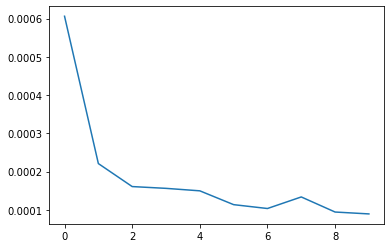

In [33]:
plt.plot(H.history['loss'])

In [34]:
y_val_pred = model.predict(X_val)
y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1,1))

y_val_true = scaler.inverse_transform(y_val.reshape(-1,1))
# compute the root mean squared error (RMSE)
error = np.sqrt(np.mean(y_val_pred - y_val_true)**2)
error1 = smape_kun(y_val_true, y_val_pred)
print(error)
print(error1)

11/11 [==============================] - 1s 14ms/step
2.16263094201553
1.960764571833389


C:\Users\abhi\AppData\Local\Temp\ipykernel_3916\1822812186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predictions'] = y_val_pred


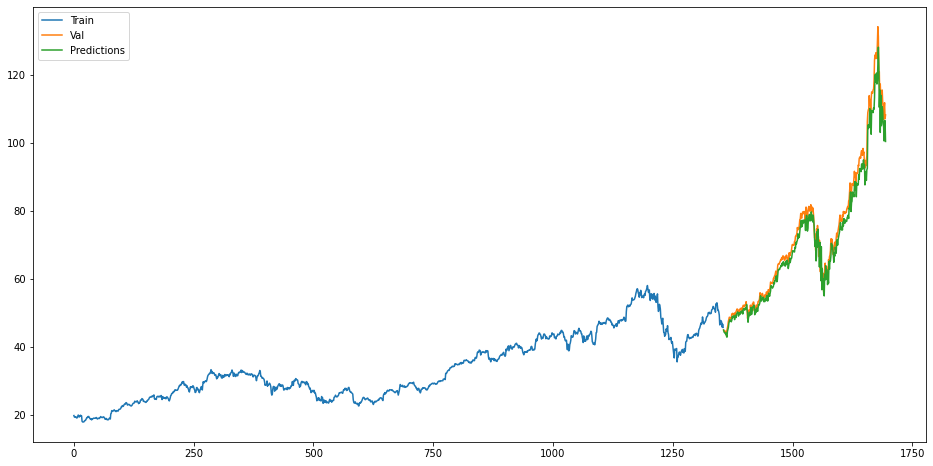

In [15]:
df_val['predictions'] = y_val_pred

plt.figure(figsize = (16,8))

plt.plot(df_train['Close'])
plt.plot(df_val[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'Predictions'])